<a href="https://colab.research.google.com/github/nawroz-m/ML_learning/blob/main/medical_cost_personal_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the cost of insurance based on the dataset availabe
1. Praper the datase
2. Praper the training and testing dataset
3. Create the model
4. Evaluate the model

In [1]:
import pandas as pd

In [3]:
# 1. Praper the dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Encode non numerical columns using pandas dummy function
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [12]:
# Prepare the Independent Variable(Feature) and Dependent Variable(Label)
X = insurance_one_hot.drop(columns="charges") # Feature
y = insurance_one_hot["charges"] # Label

In [21]:
len(X), len(y)

(1338, 1338)

In [22]:
# 2. Prepare the training and tesing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #42 to have a constant shuffle


In [24]:
len(X_train), len(y_train), len(X_test), len(y_test)

(1070, 1070, 268, 268)

## 3. Create a model

In [25]:
import tensorflow as tf

In [84]:
tf.random.set_seed(42)
# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="Input_layer_1"),
    tf.keras.layers.Dense(1, name="Output_layer"),
], name="Insurance_cost_pred")

# 2. Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=["mae"])

# 3. Fit the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)


In [29]:
y_median = tf.keras.ops.median(y_train)
y_mean = tf.keras.ops.mean(y_train)
y_mean, y_median

(<tf.Tensor: shape=(), dtype=float64, numpy=13346.089736364485>,
 <tf.Tensor: shape=(), dtype=float64, numpy=9575.4421>)

In [85]:
# Evaluate the model
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6248.4121 - mae: 6248.4121 


[6106.216796875, 6106.216796875]

In [87]:
# Make some prediction
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [88]:
# Evaluate the MAE and MSE
mae = tf.keras.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse = tf.keras.metrics.mse(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=6106.21630859375>,
 <tf.Tensor: shape=(), dtype=float32, numpy=124518288.0>)

## Experiment the model by adding extra layers, change the optimizer and epochs

In [89]:
tf.random.set_seed(42)
# 1. Create a model using sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="Input_layer_1"),
    tf.keras.layers.Dense(10, name="Input_layer_2"),
    tf.keras.layers.Dense(1, name="Output_layer"),
], name="model_2")
# 2. Compile the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.mae,
                metrics=["mae"])
# 3. Fit the model
history_2 = model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [43]:
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer_1 (Dense)           │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Input_layer_2 (Dense)           │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [90]:
model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4917.2598 - mae: 4917.2598  


[4775.47802734375, 4775.47802734375]

In [91]:
y_pred_2 = model_2.predict(X_test, verbose=0)

In [92]:
# Get the MAE
mae_2 = tf.keras.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred_2))
mae_2

<tf.Tensor: shape=(), dtype=float32, numpy=4775.47802734375>

### Let's experiment with more epochs and learning rate

In [93]:
tf.random.set_seed(42)
# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name="Model_3")

# 2. Compile the model
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.mae,
                metrics=["mae"])

# 3. fit the model
history_3 = model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [50]:
model_3.summary()

Model: "Model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [94]:
# Evaluate model 3
model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3214.0823 - mae: 3214.0823 


[3155.55712890625, 3155.55712890625]

In [95]:
# make prediction
y_pred_3 = model_3.predict(X_test, verbose=0)


In [96]:
mae_3 = tf.keras.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred_3))
mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=3155.556884765625>

### Let's train longer 500 epochs and one extra layer


In [97]:
tf.random.set_seed(42)
# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name="Model_4")
# 2. compile the model
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.mae,
                metrics=["mae"])
# 3. fit the model
history_4 = model_4.fit(X_train, y_train, epochs=500, verbose=0)

In [61]:
model_4.summary()

Model: "Model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 200)            │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,565 (275.65 KB)

 Trainable params: 23,521 (91.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,044 (183.77 KB)

In [98]:
# Evaluate the model
model_4.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3270.9341 - mae: 3270.9341 


[3216.53759765625, 3216.53759765625]

In [99]:
# Make some prediction
y_pred_4 = model_4.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [100]:
mae_4 = tf.keras.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred_4))
mae_4

<tf.Tensor: shape=(), dtype=float32, numpy=3216.537353515625>

#### Compare all the 4 model result created

In [102]:
mae.numpy(), mae_2.numpy(), mae_3.numpy(), mae_4.numpy()

(np.float32(6106.2163),
 np.float32(4775.478),
 np.float32(3155.557),
 np.float32(3216.5374))

<Axes: title={'center': 'Model 4 Training Loss'}, xlabel='epochs', ylabel='loss'>

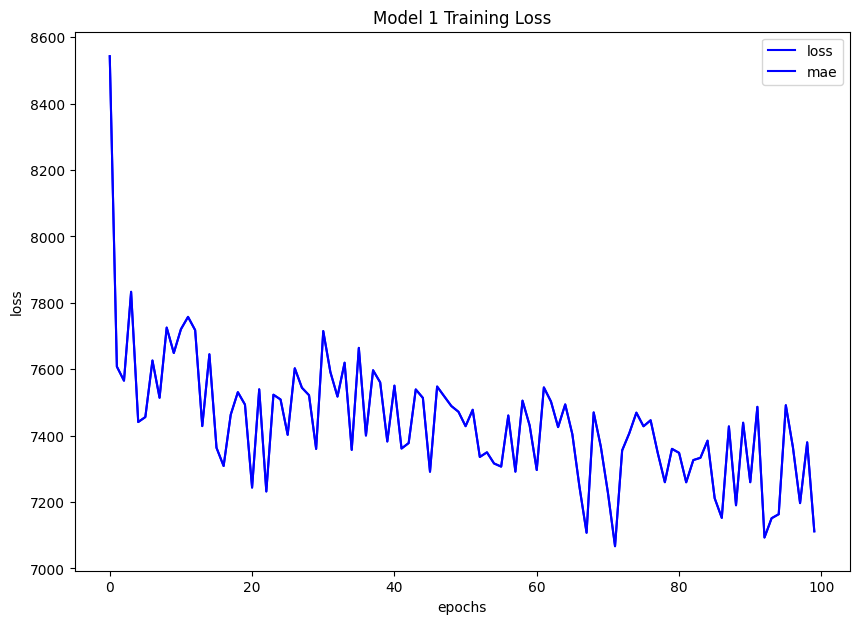

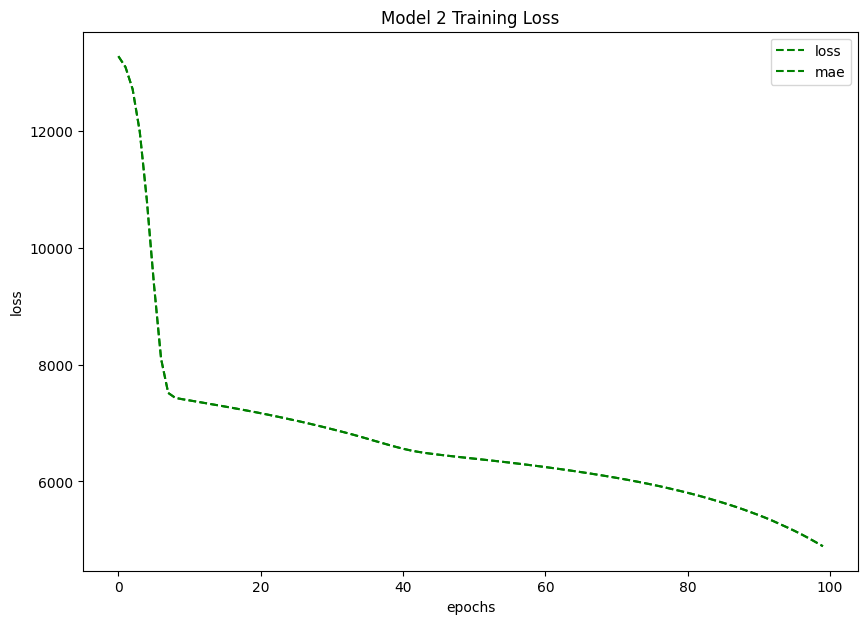

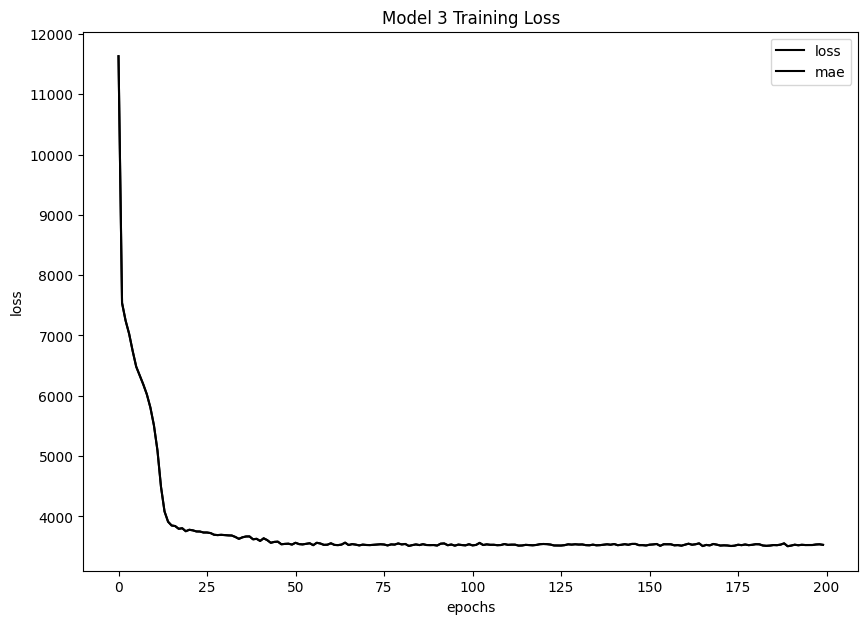

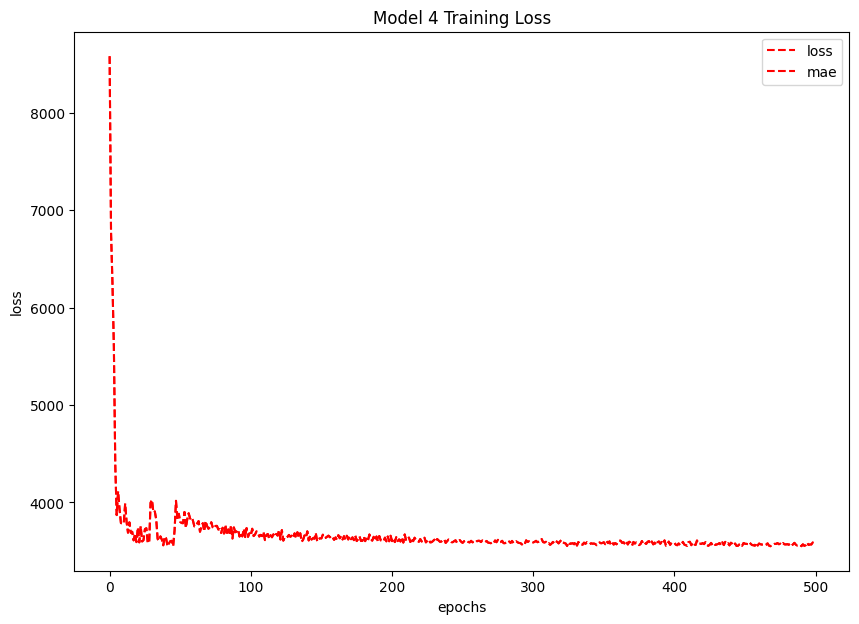

In [137]:
from os import name
# Plot History(Loss Curve or Taining Curve)
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(title="Model 1 Training Loss", color='blue', legend=True, xlabel="epochs", ylabel="loss", figsize=(10, 7))
pd.DataFrame(history_2.history).plot(title='Model 2 Training Loss', color='green', legend=True, linestyle='--', xlabel="epochs", ylabel="loss", figsize=(10, 7))
pd.DataFrame(history_3.history).plot(title='Model 3 Training Loss', color='black', legend=True, xlabel="epochs", ylabel="loss", figsize=(10, 7))
pd.DataFrame(history_4.history).plot(title='Model 4 Training Loss', color='red', legend=True, linestyle='--', xlabel="epochs", ylabel="loss", figsize=(10, 7))

